# Calculating Canopy Cover

Simple example demonstrating how to estimate canopy cover based on the number of green pixels in stereo RGB image.

Install mdld3 package for interactive plot

In [16]:
!pip install -q mpld3

In [17]:
import rasterio
import numpy as np
from osgeo import gdal, osr
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

This is a single 

In [13]:
path = "/shared/terraref/sites/ua-mac/Level_1/rgb_geotiff/2017-06-20/2017-06-20__11-13-59-637/rgb_geotiff_L1_ua-mac_2017-06-20__11-13-59-637_left.tif"

In [14]:
ds = gdal.Open(path)
ds.GetProjectionRef()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'

<IPython.core.display.Javascript object>


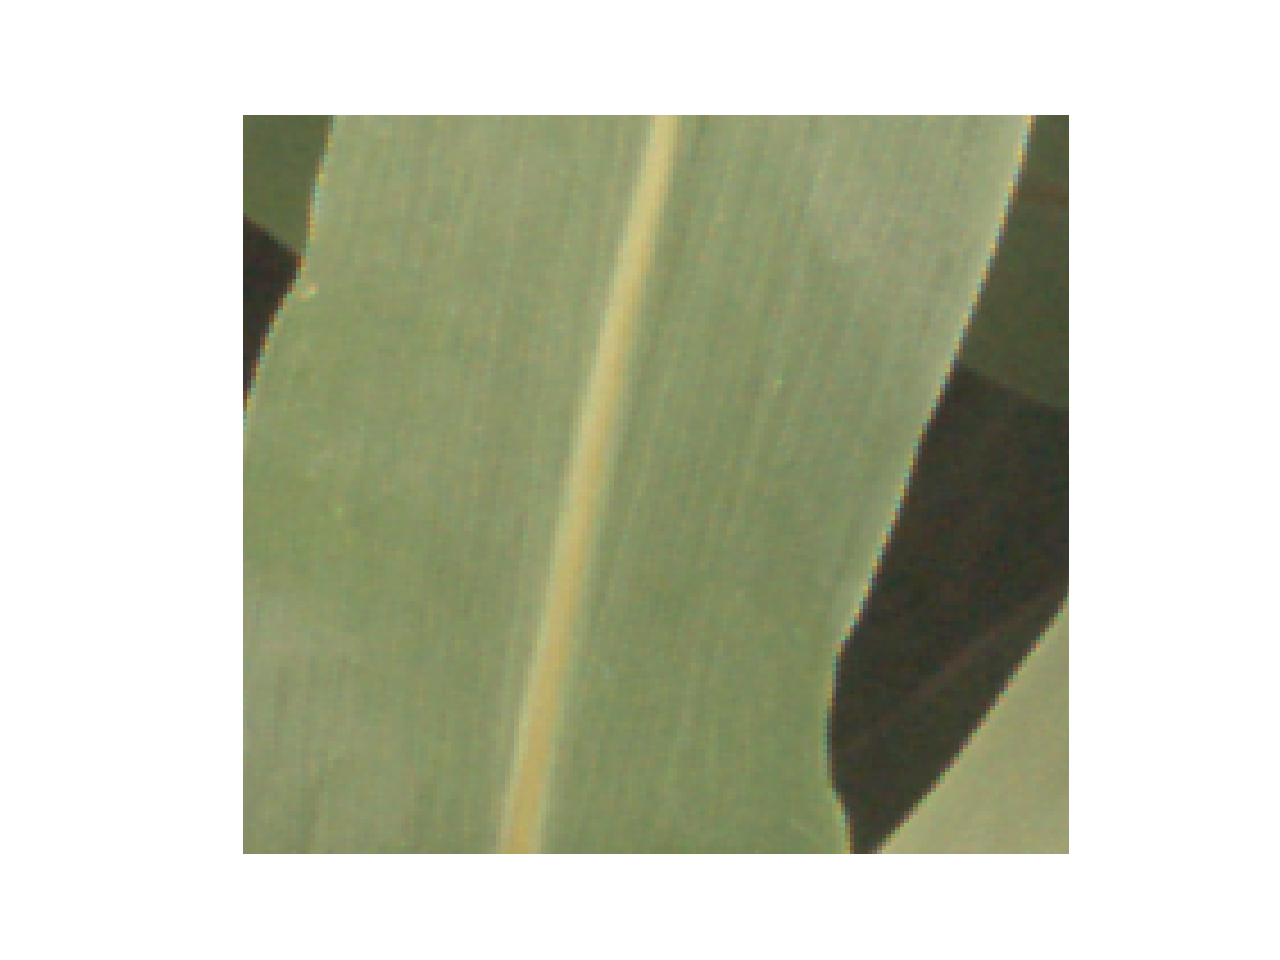

In [15]:
arr = ds.ReadAsArray()
trans = ds.GetGeoTransform()
extent = (trans[0], trans[0] + ds.RasterXSize*trans[1],
          trans[3] + ds.RasterYSize*trans[5], trans[3])

plt.imshow(arr[:3,:,:].transpose((1, 2, 0)), extent=extent)
plt.axis('off')

plt.show()

In [ ]:
kernel=5
img = np.rollaxis(arr,0,3)

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]
    
sub_img = (g.astype('int') - r.astype('int') - 2) > 0
    
mask = np.zeros_like(b)
mask[sub_img] = 255
    
im = Image.fromarray(mask)
blur = im.filter(ImageFilter.BLUR)
pix = np.array(blur)
sub_mask = pix > 128
    
c = np.count_nonzero(sub_mask)
ratio = c/float(b.size)


In [ ]:
ratio

In [ ]:
figsrc, axsrc = plt.subplots()
figzoom, axzoom = plt.subplots()
axsrc.set(xlim=(0, 1), ylim=(0, 1), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(0.45, 0.55), ylim=(0.4, 0.6), autoscale_on=False,
           title='Zoom window')

x, y, s, c = np.random.rand(4, 200)
s *= 200

axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)


def onpress(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', onpress)
plt.show()